# Исследование объявлений о продаже квартир

На основе данных сервиса Яндекс.Недвижимость — архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет установим параметры рыночной стоимости объектов недвижимости. Это позволит построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Загрузка данных и изучение общей информации

Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Загружаем и изучаем имеющиеся данные:

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('\\real_estate_data.csv', sep='\t')

In [3]:
pd.set_option('display.max_columns', 50)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Данные содержат 23699 записей, но в некоторых столбцах имеются пропуски, тип данных не везде соответствует их характеру.

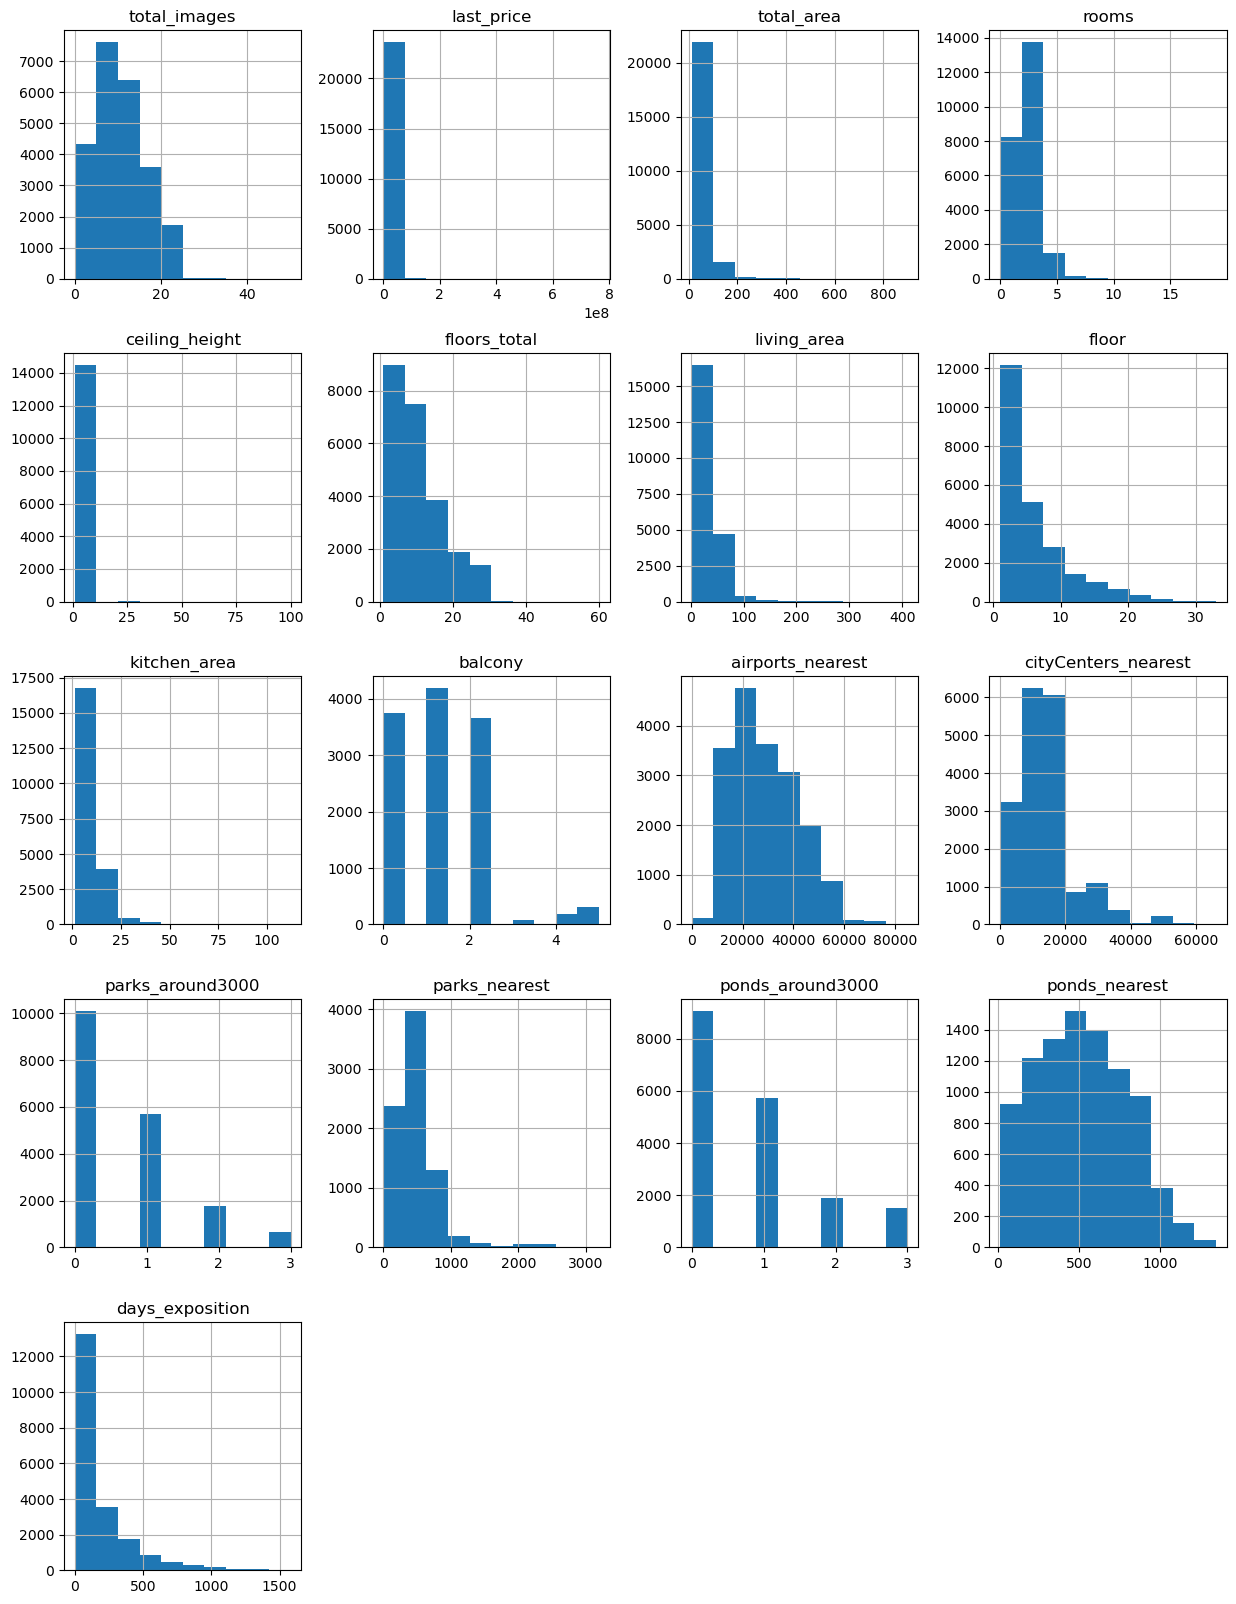

In [5]:
data.hist(figsize=(15, 20));

Гистограммы столбцов с числовыми данными дают наглядное представление о структуре данных. 
Гистограммы столбцов `'last_price', 'total_area', 'ceiling_height'` недвусмысленно намекают на наличие единичных значений, сильно выделяющихся на фоне основного объёма данных.

### Предобработка данных

Переименуем некоторые столбцы:

In [6]:
new_data = data.copy(deep=True)
new_data.rename(columns = {'cityCenters_nearest' : 'city_centers_nearest', 
                           'parks_around3000' : 'parks_around_3000', 
                           'ponds_around3000' : 'ponds_around_3000'}, inplace = True)
new_data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Преобразуем столбец с датой публикации объявления в удобочитаемый вид:

In [7]:
new_data['first_day_exposition'] = pd.to_datetime(new_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
new_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Ищем пропуски в данных:

In [8]:
new_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Обработаем пропущенные значения следующим образом:
- Пропуски в столбцах `'balcony', 'parks_around_3000', 'ponds_around_3000'` заполним нулями, т.к. можно предположить, что если не указано количество балконов, а также парков и прудов поблизости, то вероятнее всего они попросту отсутствуют. Количество балконов не может быть предствлено в виде вещественного числа; расстояния до ближайшего парка или пруда указано в метрах, поэтому указанные столбцы целесообразно сразу привести к целочисленным значениям.
- Пропущенные данные в столбце `'is_apartment'` заменим значениями `'False'`;
- Пропуски в столбце `'ceiling_height'` считаю возможным заменить медианным значением высоты потолков с округлением до 1 знака после запятой;
- Пустым ячейкам в столбце `'floors_total'` присвоим значение текущего этажа;
- Пропущенные значения столбца `'locality_name'` восстановить вряд ли возможно, поэтому решено их отбросить. Существенного влияния на исследование они не окажут т.к. они составляют лишь около 0,2% от всего объёма данных;

In [9]:
integer_columns = ['balcony', 'parks_around_3000', 'ponds_around_3000']
median_ceiling = round(new_data['ceiling_height'].median(), 1)
new_data[integer_columns] = new_data[integer_columns].fillna(0).astype(int)
new_data['is_apartment'] = new_data['is_apartment'].fillna(False)
new_data['ceiling_height'] = new_data['ceiling_height'].fillna(median_ceiling)
new_data['floors_total'] = new_data['floors_total'].fillna(new_data['floor']).astype(int)
new_data = new_data.dropna(subset=['locality_name']).reset_index(drop=True)

Изначально было решено заполнить пропуски в столбце `'living_area'` медианными значениями жилой площади в зависимости от количества комнат, однако это привело к появлению аномальных значений, когда квартира общей площадью 13 кв. метров имеет жилую площадь в 17,6 кв. метров. В результате было принято решение заполнить пропуски в столбцах `'living_area'` и `'kitchen_area'` значениями в зависимости от общей площади и округлить до 1 знака после запятой:

In [10]:
living_area = round(new_data['total_area'] /
                    (new_data['total_area'].median()
                     / new_data['living_area'].median()), 1)

kitchen_area = round(new_data['total_area'] /
                    (new_data['total_area'].median()
                     / new_data['kitchen_area'].median()), 1)

In [11]:
new_data['living_area'] = new_data['living_area'].fillna(living_area)
new_data['kitchen_area'] = new_data['kitchen_area'].fillna(kitchen_area)

In [12]:
new_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around_3000           0
parks_nearest           15586
ponds_around_3000           0
ponds_nearest           14565
days_exposition          3180
dtype: int64

Заполнить пропуски в столбцах `'floors_total', 'airports_nearest', 'city_centers_nearest', 'parks_nearest', 'ponds_nearest'` не представляется возможным, т.к. данные явно были получены из сторонней базы данных. Можно предположить, что пропуски в столбце `'days_exposition'` свидетельствуют об активном статусе объявления на момент выгрузки данных.

Займёмся поиском дубликатов:

In [13]:
new_data.duplicated().sum()

0

Явные дубликаты значений отсутствуют, поищем неявные дубликаты среди наименований населённых пунктов:

In [14]:
new_data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [15]:
print(f"Число уникальных наименований населённых пунктов: {new_data['locality_name'].nunique()}")

Число уникальных наименований населённых пунктов: 364


Наиболее часто в наименованиях населённых пунктов встречаются слова `'поселок'` и `'посёлок'`, можно первое заменить на второе.  Если верить Википедии (https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D1%81%D0%BA%D0%BE%D0%B9_%D0%BF%D0%BE%D1%81%D1%91%D0%BB%D0%BE%D0%BA) то в Ленинградской области обозначение `'городской посёлок'` является основным для `'посёлков городского типа'`. Кроме того, `'посёлок станции'` можно привести к виду `'посёлок при железнодорожной станции'`:

In [16]:
new_data['locality_name'] = new_data['locality_name'].str.replace('поселок', 'посёлок')
new_data['locality_name'] = new_data['locality_name'].str.replace('посёлок городского типа', 'городской посёлок')
new_data['locality_name'] = new_data['locality_name'].str.replace('посёлок станции', 'посёлок при железнодорожной станции')
new_data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской посёлок Большая Ижора', 'городской посёлок Будогощь',
       'городской посёлок Важины', 'городской посёлок Виллози',
       'городской посёлок Вознесенье', 'городской посёлок Вырица',
       'городской посёлок Дружная Горка', 'городской посёлок Дубровка',
       'городской посёлок Ефимовский', 'городской посёлок Кондратьево',
       'городской посёлок Красный Бор', 'городс

In [17]:
print(f"Число уникальных наименований населённых пунктов: {new_data['locality_name'].nunique()}")

Число уникальных наименований населённых пунктов: 321


Займёмся поиском аномалий в данных:

In [18]:
new_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,18116.000000,18139.000000,23650.000000,8064.000000,23650.000000,9085.000000,20470.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.704945,10.673784,34.612513,5.893277,10.501952,0.591712,28803.225878,14197.860742,0.469091,490.830729,0.590359,518.059879,180.753200
std,5.682278,1.089640e+07,35.661808,1.078620,0.991008,6.593455,22.386825,4.883317,6.036891,0.959662,12637.314144,8606.830295,0.748458,342.554386,0.883539,277.841733,219.777916
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18575.750000,9241.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.600000,9.000000,30.000000,4.000000,9.000000,0.000000,26756.500000,13105.000000,0.000000,454.500000,0.000000,502.000000,95.000000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


- Поскольку данные в некоторых столбцах взяты из сторонней базы (например, `'city_centers_nearest'`, `'parks_around_3000'`, `'parks_nearest'`, `'ponds_around_3000'`, `'ponds_nearest'`), то проверить их правдивость вряд ли возможно. Однако, ручная выборочная проверка данных в столбцах `'airports_nearest'` и `'locality_name'` даёт основания предположительно считать их правдоподобными.

- Максимальная цена квартиры в столбце `'last_price'` равна 763 миллона рублей, но это единичный случай, который в рамках нашего исследования не представляет ценности.
- Минимальное значение в столбце `'last_price'` 12190, похоже там потеряли три нуля, но нельзя утверждать это наверняка, поэтому эту квартиру просто удалим.

In [19]:
new_data = new_data.query('13000 < last_price <= 15000000')

- Столбец `'total_area'` - Квартира общей площадью 900 кв. метров стоимостью 420 000 000 оказалась реально существующим объектом недвижимости, однако такие предложения на рынке недвижимости являются единичными и не подходят для целей нашего исследования. Вполне разумно будет избавиться от квартир площадью свыше 150 квадратных метров.
- Столбец `'total_area'` - Квартиры общей площадью 12 и 13 квадратных метров вполне могут оказаться комнатой в коммунальной квартире, либо жильём суперэконом-класса в новостройках.

In [20]:
new_data = new_data.query('total_area <= 150')

- Столбец `'rooms'` содержит значения, равные нулю. Хотя бы одна комната должна присутствовать, поэтому заменим `'0'` на `'1'`;
- Кроме того, в столбце `'rooms'` есть квартира с 19 комнатами. Учитывая, что это Санкт-Петербург, такая квартира вполне может оказаться реальной: например, это целый этаж в бывшем доходном доме, который объединили в 1 квартиру с большим числом комнат. Для данного исследования ограничимся квартирами с 6 комнатами.

In [21]:
new_data['rooms'] = new_data['rooms'].replace(0, 1)
new_data = new_data.query('rooms <= 6')

- Изучим более подробно, какие значения встречаются в столбце `'ceiling_height'`:

In [22]:
new_data['ceiling_height'].sort_values(ascending=False).unique()

array([100.  ,  32.  ,  27.5 ,  27.  ,  26.  ,  25.  ,  24.  ,  22.6 ,
        20.  ,  14.  ,  10.3 ,   8.3 ,   8.  ,   5.8 ,   5.3 ,   5.  ,
         4.8 ,   4.7 ,   4.5 ,   4.4 ,   4.37,   4.3 ,   4.25,   4.2 ,
         4.19,   4.15,   4.14,   4.1 ,   4.06,   4.  ,   3.98,   3.95,
         3.93,   3.9 ,   3.88,   3.85,   3.84,   3.83,   3.8 ,   3.78,
         3.75,   3.7 ,   3.68,   3.67,   3.66,   3.65,   3.63,   3.62,
         3.6 ,   3.59,   3.57,   3.56,   3.55,   3.54,   3.53,   3.52,
         3.5 ,   3.49,   3.48,   3.47,   3.46,   3.45,   3.44,   3.42,
         3.4 ,   3.39,   3.38,   3.37,   3.36,   3.35,   3.34,   3.33,
         3.32,   3.31,   3.3 ,   3.28,   3.27,   3.26,   3.25,   3.24,
         3.23,   3.22,   3.21,   3.2 ,   3.18,   3.17,   3.16,   3.15,
         3.14,   3.13,   3.12,   3.11,   3.1 ,   3.09,   3.08,   3.07,
         3.06,   3.05,   3.04,   3.03,   3.02,   3.01,   3.  ,   2.99,
         2.98,   2.97,   2.96,   2.95,   2.94,   2.93,   2.92,   2.91,
      

В столбце `'ceiling_height'` значения 32, 27.5, 27, 26, 25 предположительно соответствуют значениям 3.2, 2.75, 2.7, 2.6, 2.5. Значения высоты потолка меньше 2.5 и более 4.2 будем считать выбросами и удалим.

- Исправим значения 32, 27.5, 27, 26, 25, удалим значения высоты меньше 2.5 и выше 4.2

In [23]:
new_data['ceiling_height'] = new_data['ceiling_height'].replace(
    {32: 3.2, 27.5: 2.7, 27: 2.7, 26: 2.6, 25: 2.5}
)
new_data = new_data.query('2.5 <= ceiling_height <= 4.2').reset_index(drop=True)
new_data['ceiling_height'] = round(new_data['ceiling_height'], 1)

- Проверим результат:

In [24]:
new_data['ceiling_height'].sort_values(ascending=False).unique()

array([4.2, 4.1, 4. , 3.9, 3.8, 3.7, 3.6, 3.5, 3.4, 3.3, 3.2, 3.1, 3. ,
       2.9, 2.8, 2.7, 2.6, 2.5])

В данных о продажах квартир в столбце `'floors_total'` есть жилые здания насчитывающие 52 и 60 этажей. Предлагаю рассматривать их как выбросы и ограничиться высотностью зданий в 33 этажа.

In [25]:
new_data = new_data.query('floors_total <= 33')

В столбце `'living_area'` обнаружились 6 квартир с жилой площадью меньше 6 квадратных метров. Поскольку в РФ законозательно закреплен минимальный размер жилой площади в 6 квадратных метров на 1 человека, считаю возможным этими данными пренебречь.

In [26]:
new_data = new_data.query('living_area >= 6')

В столбце `'airports_nearest'` обнаружена строка с нулевым значением. Поскольку в аэропорту жилая недвижимость не продаётся, то мы эту строку удаляем.

In [27]:
new_data = new_data.query('airports_nearest != 0')

- Количество дней в столбце `'days_exposition'` можно считать правдоподобным, т.к. некоторые вещи могут быть куплены в течение нескольких часов или минут, а другие могут продаваться очень долго...

Итого: в наш датасет должны войти квартиры, удовлетворяющие следующим требованиям:
- общая площадь до 150 квадратных метров включительно;
- стоимость до 15 миллионов, исключая странную цену в 12190;
- исключим дома, имеющую больше 33 этажей в высоту;
- максимальное число комнат ограничим 6;
- исключим объявления с указанной жилой площадью менее 6 квадратных метров;
- расстояние до аэропорта не может равняться 0;

new_data = new_data.query('total_area <=150 and 13000 < last_price <= 15000000 and floors_total <= 33 and rooms <= 6 and living_area >= 6 and airports_nearest != 0')

In [28]:
preliminary = round((1 - new_data.shape[0] / data.shape[0])*100, 2)
print(f"В результате проведённых манипуляций отброшено {preliminary}% данных.")

В результате проведённых манипуляций отброшено 6.21% данных.


### Расчёт и добавление в таблицу новых столбцов

Добавим в таблицу новые столбцы:
- `'square_meter_price'` цена одного квадратного метра;
- `'list_day'` день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- `'list_month'` месяц публикации объявления;
- `'list_year'` год публикации объявления;
- `'floor_type'` тип этажа квартиры (значения — «первый», «последний», «другой»);
- `'km_to_center'` расстояние до центра города в километрах c округлением до целых значений.

In [29]:
new_data['square_meter_price'] = (new_data['last_price'] / 
                                  new_data['total_area']).astype(int)
new_data['list_day'] = new_data['first_day_exposition'].dt.day_name()
new_data['list_month'] = new_data['first_day_exposition'].dt.month
new_data['list_year'] = new_data['first_day_exposition'].dt.year

In [30]:
def floor_cat(floor):
    if floor['floor'] == 1:
        return 'первый'
    elif floor['floor'] == floor['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
new_data['floor_type'] = new_data[['floor', 'floors_total']].apply(floor_cat, axis=1)
new_data['km_to_center'] = round(new_data['city_centers_nearest'] / 1000, 0)

In [31]:
new_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,list_day,list_month,list_year,floor_type,km_to_center
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370,Thursday,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.6,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920,Tuesday,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.6,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785,Thursday,8,2015,другой,14.0
3,2,10000000.0,100.0,2018-06-19,2,3.0,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000,Tuesday,6,2018,другой,8.0
4,10,2890000.0,30.4,2018-09-10,1,2.6,12,14.4,5,False,False,False,9.1,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065,Monday,9,2018,другой,NaN


### Исследовательский анализ данных

In [32]:
new_data[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor', 'floors_total', 'city_centers_nearest', 'airports_nearest', 'parks_nearest', 'list_day']].describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,city_centers_nearest,airports_nearest,parks_nearest
count,22228.000000,22228.000000,22228.000000,2.222800e+04,22228.000000,22228.000000,22228.000000,22228.000000,16778.000000,16763.000000,7134.000000
mean,54.728943,31.409677,9.740178,5.130602e+06,1.974852,2.662673,5.889959,10.748650,14698.527417,28905.080594,491.458228
std,20.563543,14.179438,4.161208,2.671528e+06,0.916963,0.190511,4.885575,6.576244,8543.844600,12886.109854,336.544788
min,12.000000,6.000000,1.300000,4.300000e+05,1.000000,2.500000,1.000000,1.000000,208.000000,6450.000000,1.000000
25%,39.300000,18.600000,7.000000,3.350000e+06,1.000000,2.600000,2.000000,5.000000,10251.000000,18236.500000,289.250000
50%,50.000000,29.700000,9.000000,4.500000e+06,2.000000,2.600000,4.000000,9.000000,13394.000000,26980.000000,456.000000
75%,65.425000,40.000000,11.102500,6.280750e+06,3.000000,2.700000,8.000000,16.000000,16536.000000,37557.500000,614.000000
max,150.000000,128.000000,64.000000,1.500000e+07,6.000000,4.200000,32.000000,33.000000,65968.000000,84869.000000,3190.000000


count    22228.000000
mean        54.728943
std         20.563543
min         12.000000
25%         39.300000
50%         50.000000
75%         65.425000
max        150.000000
Name: total_area, dtype: float64

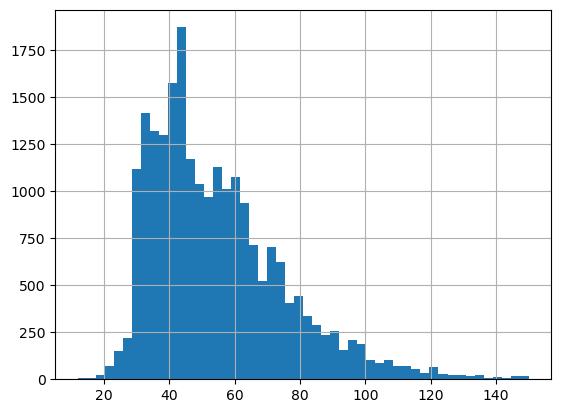

In [33]:
display(new_data['total_area'].describe())
new_data['total_area'].hist(bins=50, range=(12, 150));

- Общая площадь представленных в таблице квартир колеблется в диапазоне от 12 до 150 квадратных метров, при этом медианное значение равно всего 50 квадратным метрам. Первая четверть выборки ограничена отметкой в 39.3, а третья равна 65.4 квадратных метров.

count    22228.000000
mean        31.409677
std         14.179438
min          6.000000
25%         18.600000
50%         29.700000
75%         40.000000
max        128.000000
Name: living_area, dtype: float64

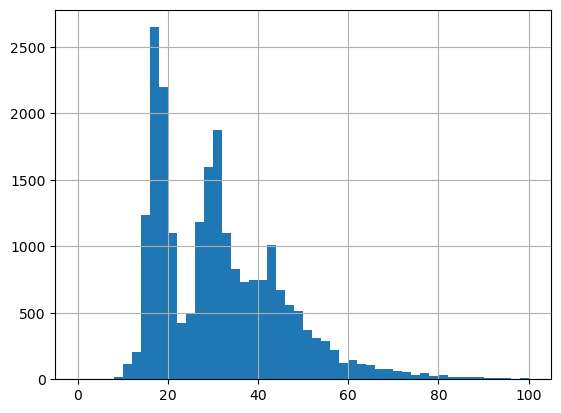

In [34]:
display(new_data['living_area'].describe())
new_data['living_area'].hist(bins=50, range=(0, 100));

- Жилая площадь: минимальная по закону не может быть меньше 6 метров на 1 человека, максимальная составила почти 128 квадратных метров, однако медиана находится на уровне всего в 29.7 квадратных метров, первый и третий квартили составляют 18.6 и 40 метров соответственно.

count    22228.000000
mean         9.740178
std          4.161208
min          1.300000
25%          7.000000
50%          9.000000
75%         11.102500
max         64.000000
Name: kitchen_area, dtype: float64

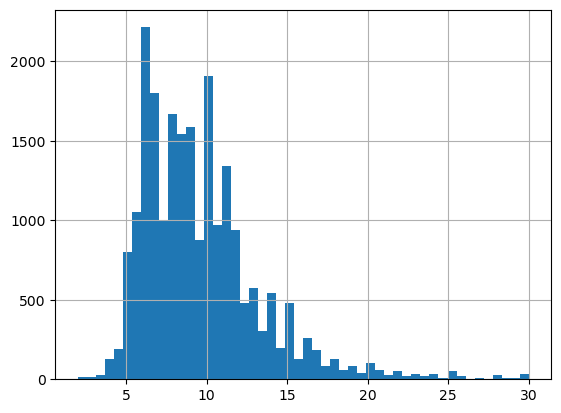

In [35]:
display(new_data['kitchen_area'].describe())
new_data['kitchen_area'].hist(bins=50, range=(2, 30));

- Площадь кухни варьируется в диапазоне от 1.3 до 64 квадратных метра. Q1 равно 7, Q2 равно 9 а Q3 составляет 11.1 метров соответственно.

count    22228.000000
mean         5.130602
std          2.671528
min          0.430000
25%          3.350000
50%          4.500000
75%          6.280750
max         15.000000
Name: last_price, dtype: float64

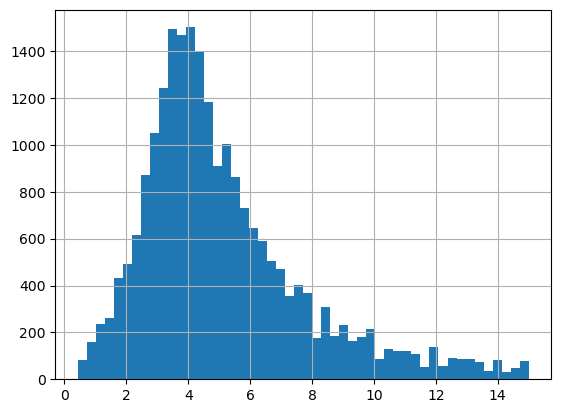

In [36]:
display((new_data['last_price'] / 1000000).describe())
(new_data['last_price'] / 1000000).hist(bins=50, range=(0.43, 15));

- Цена объектов недвижимости варьируется в пределах от 0.43 до 15 миллионов. Медианная стоимость жилья составляет 4,5 миллиона. К дешёвому жилью можно отнести недвижимость стоимостью 3,35 миллиона, к дорогому - свыше 6,29 миллиона.

count    22228.000000
mean         1.974852
std          0.916963
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

<Axes: >

1    36.74
2    34.64
3    23.92
4     3.90
5     0.71
6     0.09
Name: rooms, dtype: float64

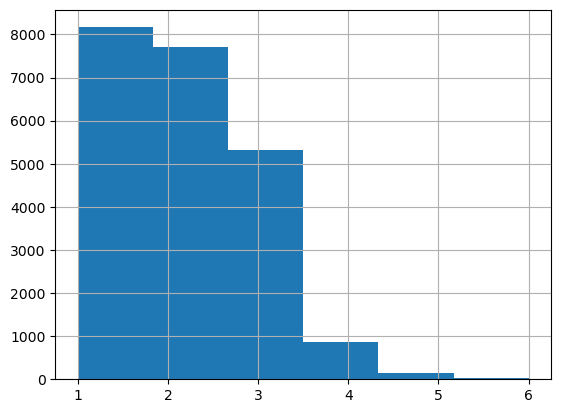

In [37]:
display(new_data['rooms'].describe())
display(new_data['rooms'].hist(bins = new_data['rooms'].max(), range=(1, 6)));
round(new_data['rooms'].value_counts(normalize=True)*100, 2)

- Количество комнат в предлагаемых к покупке квартирах колеблется в диапазоне от одной до шести. Одно и двухкомнатные квартиры представлены примерно поровну и в сумме составляют более 71% от всего предложения. На долю трёхкомнатных квартир приходится около 24%, таким образом, однако основную массу жилья составляют квартиры с числом комнат до трёх включительно. Доля квартир с числом комнат более четырёх составляет менее 5%.

count    22228.000000
mean         2.662673
std          0.190511
min          2.500000
25%          2.600000
50%          2.600000
75%          2.700000
max          4.200000
Name: ceiling_height, dtype: float64

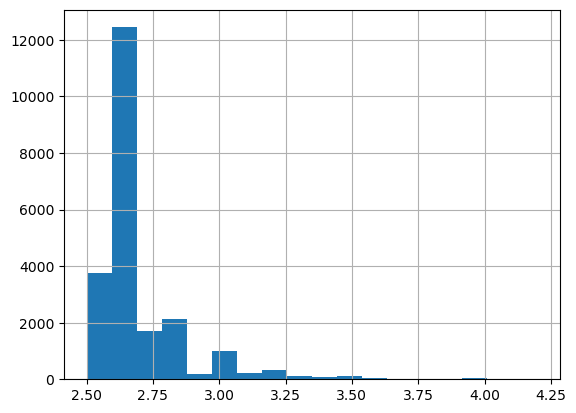

In [38]:
display(new_data['ceiling_height'].describe())
new_data['ceiling_height'].hist(bins=18, range=(2.5, 4.2));

- Высоту потолков мы ранее уже обработали таким образом, что минимальная высота составляет 2.5 метра, максимальная 4.2 метра при этом до половины всех продаваемых квартир имеют высоту потолков 2,6 метра, и только менее 25% квартир имеют потолки высотой 2,7 метра и выше;

count    22228.000000
mean         5.889959
std          4.885575
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         32.000000
Name: floor, dtype: float64

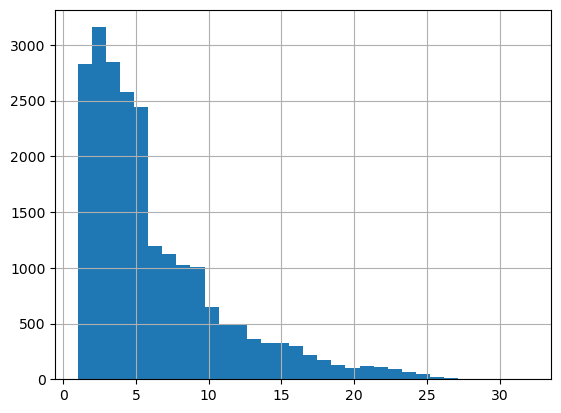

In [39]:
display(new_data['floor'].describe())
new_data['floor'].hist(bins=32, range=(1, 32));

- В объявлениях о продаже встречаются квартиры, расположенные как на первом, так и на тридцать втором этажах. Три четверти продаваемых квартир расположены не выше 8 этажа.

другой       16261
последний     3143
первый        2824
Name: floor_type, dtype: int64

другой       73.16
последний    14.14
первый       12.70
Name: floor_type, dtype: float64

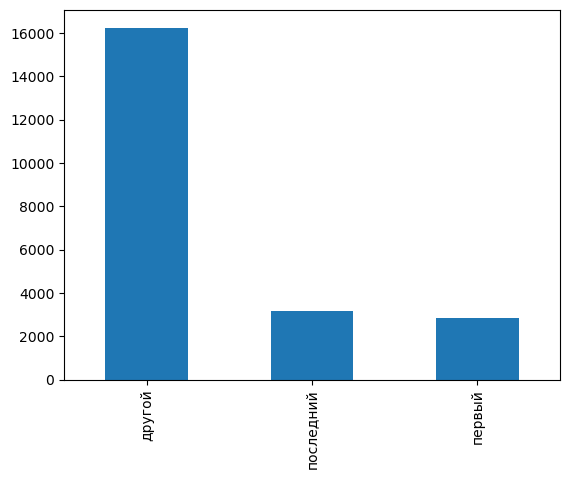

In [40]:
display(new_data['floor_type'].value_counts())
display(round(new_data['floor_type'].value_counts(normalize=True)*100, 2))
new_data['floor_type'].value_counts().plot(x='floor_type', kind='bar');

- По типу этажа квартиры («первый», «последний», «другой») недвижимость распределена следующим образом: доли квартир на первом и последнем этажах примерно равны, доля прочих этажей составляет чуть более 73%;

count    22228.000000
mean        10.748650
std          6.576244
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         33.000000
Name: floors_total, dtype: float64

<Axes: >

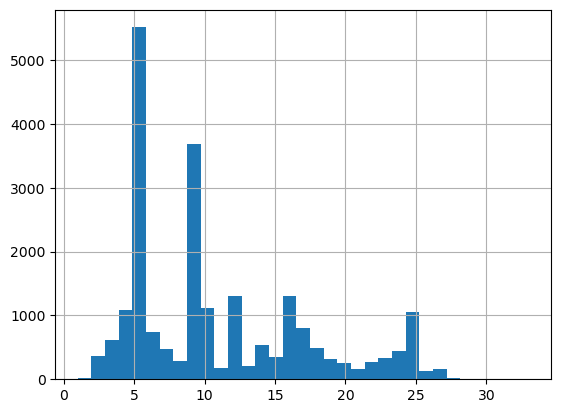

In [41]:
display(new_data['floors_total'].describe())
new_data['floors_total'].hist(bins=33, range=(1, 33))

- Общее количество этажей в доме может достигать 33, медианное значение этажности равно 9, первый и третий квартиль выборки составляют 5 и 16 этажей соответственно;

count    16778.000000
mean     14698.527417
std       8543.844600
min        208.000000
25%      10251.000000
50%      13394.000000
75%      16536.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

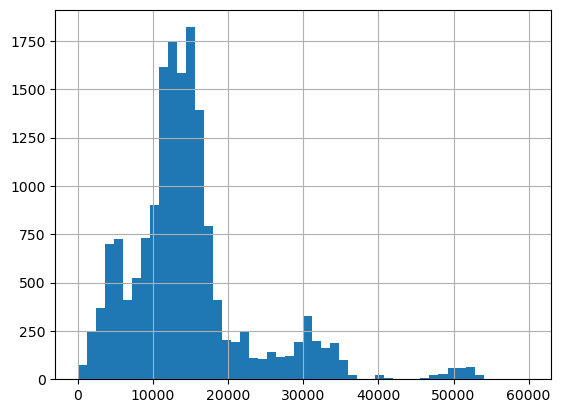

In [42]:
display(new_data['city_centers_nearest'].describe())
new_data['city_centers_nearest'].hist(bins=50, range=(0, 60000));

- Квартиры могут располагаться как прямо в центре города (208 метров) так и на значительном от него удалении (почти 66 тысяч метров). Q1 равно 10251, Q2 равно 13390 а Q3 составляет 16536 метров.

count    16763.000000
mean     28905.080594
std      12886.109854
min       6450.000000
25%      18236.500000
50%      26980.000000
75%      37557.500000
max      84869.000000
Name: airports_nearest, dtype: float64

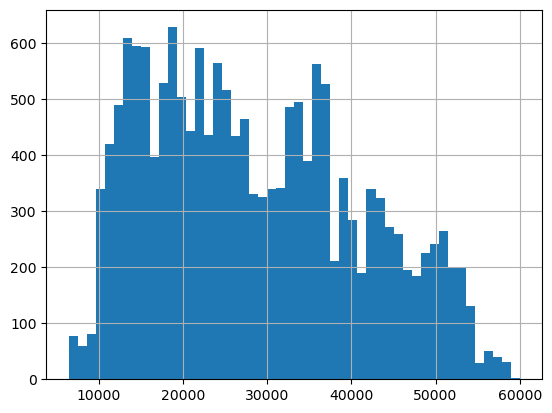

In [43]:
display(new_data['airports_nearest'].describe())
new_data['airports_nearest'].hist(bins=50, range=(6450, 60000));

- Ближайший к аэропорту объект недвижимости расположен на расстоянии 6450 метров, наиболее удалённый - 84869 метров. Первая четверть выборки ограничена 18233 метрами, вторая 26980, третья равна 37552 метров;

count    7134.000000
mean      491.458228
std       336.544788
min         1.000000
25%       289.250000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

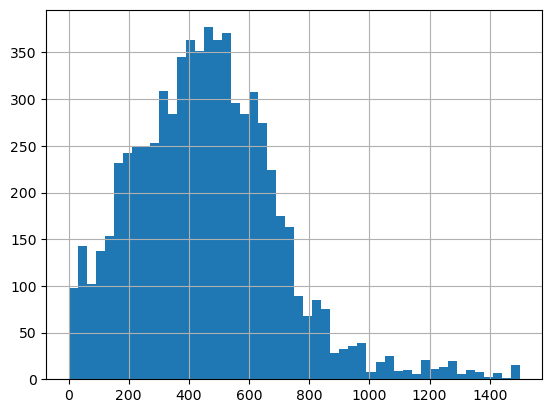

In [44]:
display(new_data['parks_nearest'].describe())
new_data['parks_nearest'].hist(bins=50, range=(1, 1500));

- Минимальное расстояние до ближайшего парка составляет всего 1 метр! Очень удобно, при условии, что вход в парк расположен не с противоположной стороны. Самая удалённая от парка квартира находится в 3190 метрах. Первый квартиль значений равен 289.5 межквартильное расстояние составляет 325, медианное значение составляет 456;

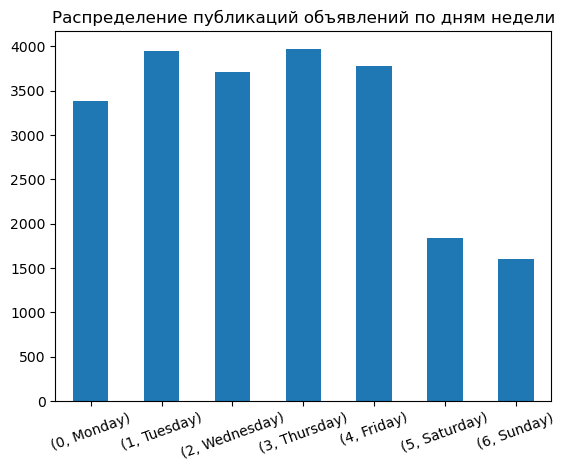

In [45]:
new_data['day_number'] = new_data['first_day_exposition'].dt.weekday
new_data.groupby(['day_number', 'list_day'])['day_number'].agg('count')\
.plot(xlabel='', kind='bar', rot=20, title='Распределение публикаций объявлений по дням недели');

- Из представленного графика видно, что в целом `в течение рабочей недели объявления публикуются достаточно активно`, достигая своего пика `в четверг`. В выходные дни заметен резкий спад, `меньше всего объявлений публикуется по воскресеньям`. 

2     11.12
3     10.95
4     10.08
11    10.00
10     9.03
9      8.37
6      7.44
8      7.37
7      7.13
12     6.90
1      6.25
5      5.36
Name: list_month, dtype: float64

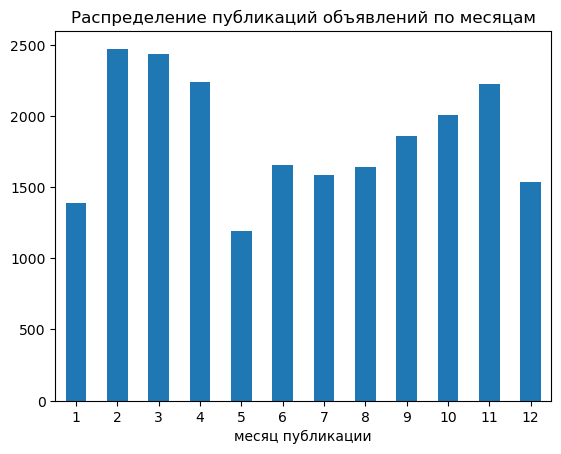

In [46]:
display((new_data['list_month'].value_counts(normalize=True)*100).round(decimals=2))
new_data.groupby('list_month')['list_month'].agg('count')\
.plot(xlabel='месяц публикации', kind='bar', rot=0, title='Распределение публикаций объявлений по месяцам');

- В целом, в декабре-январе активность достаточно низкая, внезапно достигает своего максимума в феврале, постепенно снижается в марте-апреле, уходя в пике в мае. В летние месяцы активность находится на среднем уровне, постепенно возрастая к ноябрю.

### Рассмотрим скорость продажи квартир:

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

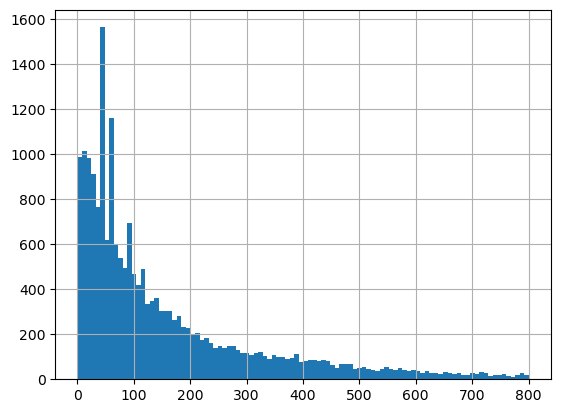

In [47]:
display(data['days_exposition'].describe())
data['days_exposition'].hist(bins=100, range=(1, 800));

- Среднее время продажи квартиры составляет 180 дней, при том, что половина квартир была продана в течение 95 дней. Рекорд скорости в продаже квартиры - 1 день, а вот кому-то не повезло: квартира продавалась более 4 лет (1580 дней)! К "быстрым" продажам можно отнести квартиры, проданные в течение 45 дней, к медленным - 232 день.

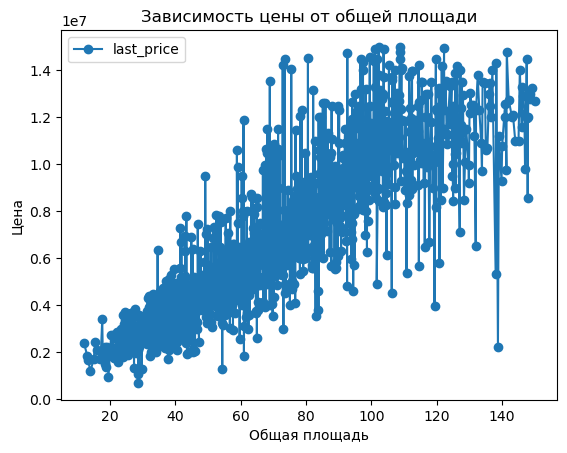

In [48]:
new_data.groupby('total_area').agg({'last_price': 'median'}).plot(
    xlabel='Общая площадь', ylabel='Цена', style='o-', title='Зависимость цены от общей площади');

- Цена напрямую зависит от общей площади. Имеющиеся отдельные всплески позволяют предположить, что на цену этих объектов недвижимости оказывают влияние также иные факторы.

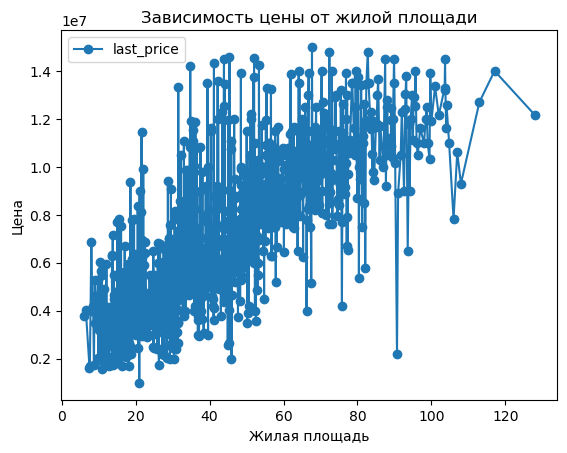

In [49]:
new_data.groupby('living_area').agg({'last_price': 'median'}).plot(
    xlabel='Жилая площадь', ylabel='Цена', style='o-', title='Зависимость цены от жилой площади');

- Представленный график свидетельствует о наличии прямой взаимосвязи цены и жилой площади. Имеющиеся отдельные всплески позволяют предположить, что на цену этих объектов недвижимости оказывают влияние также иные факторы.

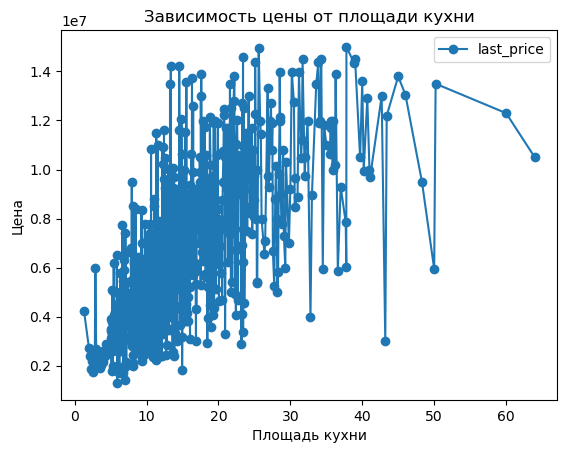

In [50]:
new_data.groupby('kitchen_area').agg({'last_price': 'median'}).plot(
    xlabel='Площадь кухни', ylabel='Цена', style='o-', title='Зависимость цены от площади кухни');

- Представленный график свидетельствует о наличии средней степени взаимосвязи цены и площади кухни. Имеющиеся отдельные всплески позволяют предположить, что на цену этих объектов недвижимости оказывают влияние также иные факторы.

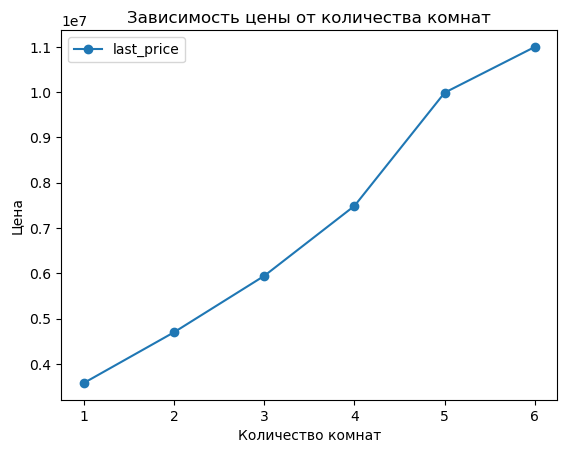

In [51]:
new_data.groupby('rooms').agg({'last_price': 'median'}).plot(
    xlabel='Количество комнат', ylabel='Цена', style='o-', title='Зависимость цены от количества комнат');

- График демонстрирует прямую зависимость цены от количества комнат.

,last_price
floor_type,
другой,4.68
первый,3.85
последний,4.15


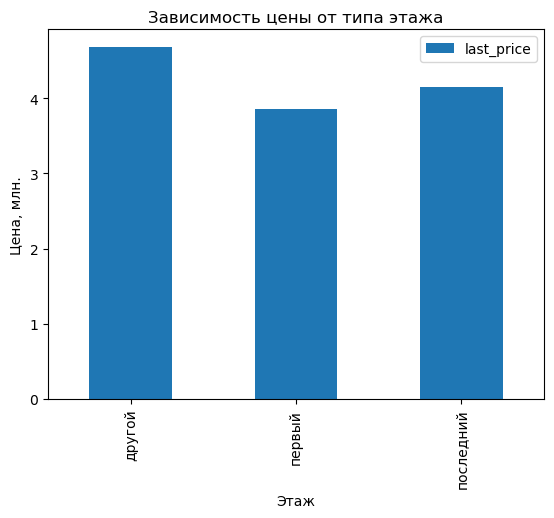

In [52]:
price_floor = new_data.groupby('floor_type').agg({'last_price': 'median'}) / 1000000
display(price_floor)
price_floor.plot(xlabel='Этаж', ylabel='Цена, млн.', kind='bar', title='Зависимость цены от типа этажа');

- График зависимости цены квартиры от типа этажа показывает, что наиболее ценятся квартиры, расположенные в "серединке", наименьшей стоимостью отличаются квартиры, расположенные на первом этаже, квартиры на последних этажах зданий ценятся чуть выше.

,,last_price
day_number,list_day,
0,Monday,4.50
1,Tuesday,4.59
2,Wednesday,4.50
3,Thursday,4.50
4,Friday,4.46
5,Saturday,4.48
6,Sunday,4.48


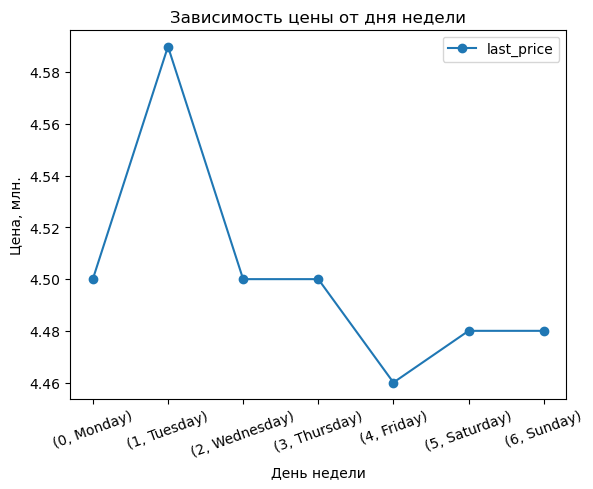

In [53]:
price_day = new_data.groupby(['day_number', 'list_day']).agg({'last_price': 'median'}) / 1000000
display(price_day)
price_day.plot(xlabel='День недели', ylabel='Цена, млн.',
               style='o-', title='Зависимость цены от дня недели', rot=20);

- Достаточно любопытно выглядит график зависимости цены недвижимости от дня публикации. Наиболее дорогая недвижимость выставляется на продажу по вторникам, к выходным цена недвижимости резко падает. Однако самые дешёвые варианты появляются по пятницам.

,last_price
list_month,
1,4.5000
2,4.5000
3,4.5000
4,4.6580
5,4.4100
6,4.2990
7,4.4945
8,4.4925
9,4.5500


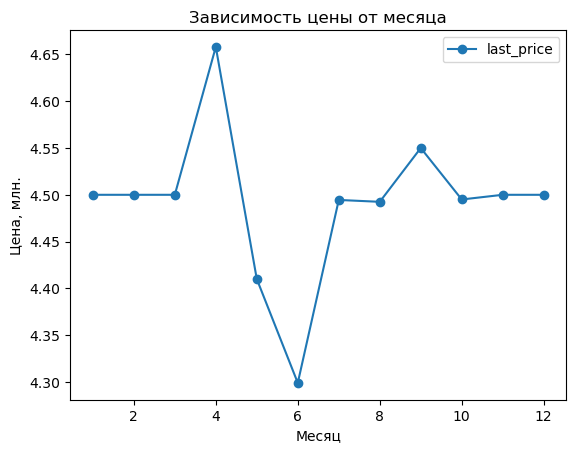

In [54]:
price_month = new_data.groupby('list_month').agg({'last_price': 'median'}) / 1000000
display(price_month)
price_month.plot(xlabel='Месяц', ylabel='Цена, млн.',
               style='o-', title='Зависимость цены от месяца');

- Данный график показывает, что цены на жильё достигают пиковых значений в апреле, затем стремительно падают и достигают своего минимума в июне. В остальное время стоимость жилья колеблется вокруг отметки в 4.5 млн.

,last_price
list_year,
2014,6.05125
2015,5.00000
2016,4.37000
2017,4.35000
2018,4.49250
2019,4.90000


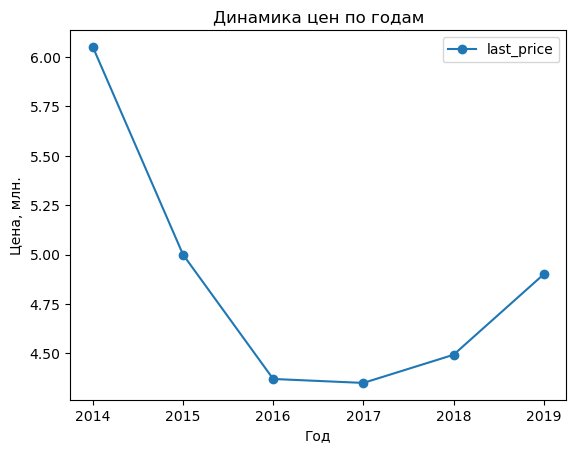

In [55]:
price_year = new_data.groupby('list_year').agg({'last_price': 'median'}) / 1000000
display(price_year)
price_year.plot(xlabel='Год', ylabel='Цена, млн.',
               style='o-', title='Динамика цен по годам');

- Динамика стоимости жилья по годам демонстрирует стремительное снижение стоимости квартир с 2014 по 2016 годы, затем с 2017 наметился умеренный рост стоимости.

Рассчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра:

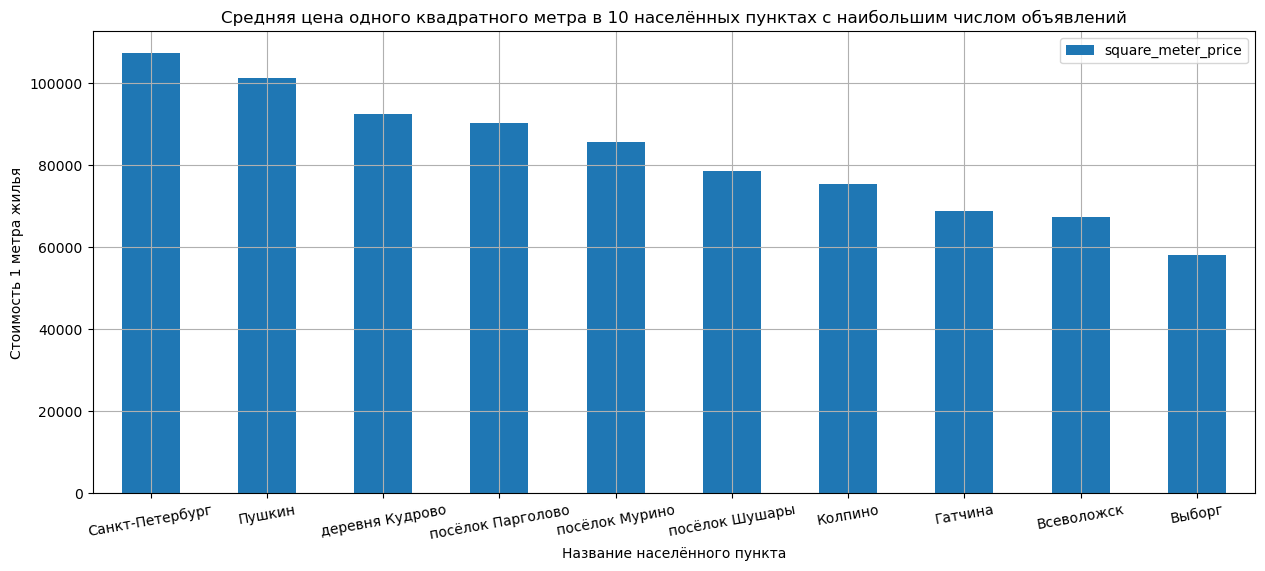

In [56]:
top_10 = new_data['locality_name'].value_counts().head(10)
(new_data.query('locality_name in @top_10.index').groupby('locality_name').agg(
    {'square_meter_price': 'mean'})).sort_values(by='square_meter_price', ascending=False).plot(
    title='Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений',
    xlabel='Название населённого пункта',
    ylabel='Стоимость 1 метра жилья',
    grid=True,
    kind='bar',
    rot=10,
    figsize=(15, 6)
);

- Среди 10 населённых пунктов с наибольшим числом объявлений самая высокая средняя цена квадратного метра в Санкт-Петебрурге а самая низкая в Выборге.

Вычислим среднюю цену каждого километра:

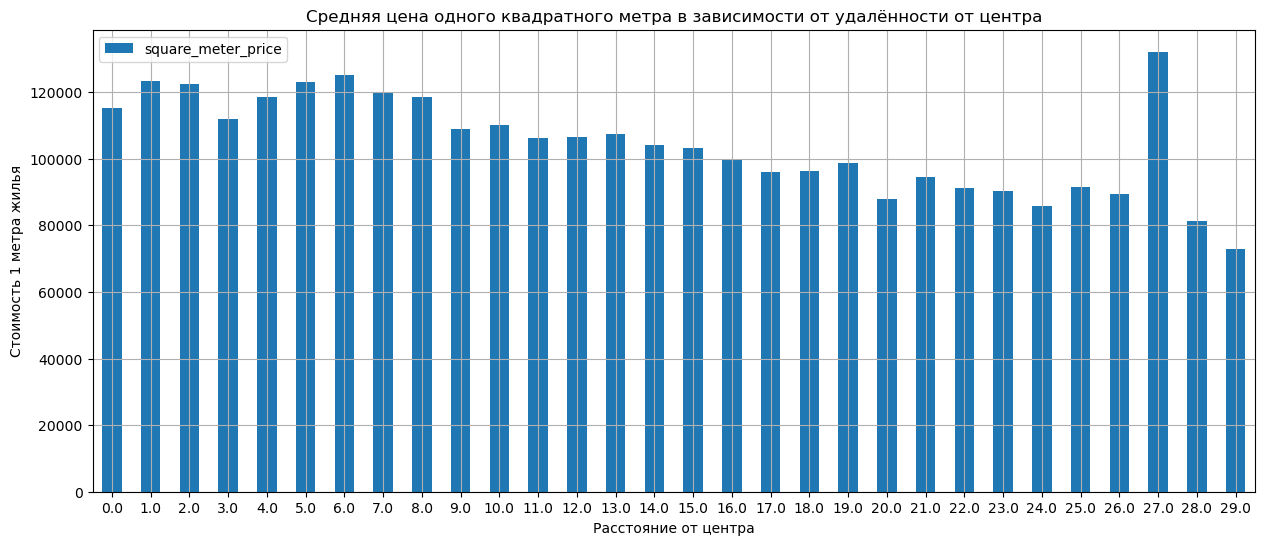

In [57]:
(new_data.query('locality_name == "Санкт-Петербург"').groupby('km_to_center').agg(
    {'square_meter_price': 'mean'})).sort_values('km_to_center').plot(
    title='Cредняя цена одного квадратного метра в зависимости от удалённости от центра',
    xlabel='Расстояние от центра',
    ylabel='Стоимость 1 метра жилья',
    kind='bar',
    grid=True,
    rot=0,
    figsize=(15, 6)
);

- Cтоимость квартир в большинстве случаев снижается при удалении от центра города. Наиболее дорогая недвижимость сосредоточена в радиусе 8 километров от центра города. Всплеск стоимости на отметке 27 км объясняется наличием всего 2 объектов недвижимости и значительной разницей в их стоимости. 

### Общий вывод

Подводя итоги исследования можно сделать вывод, что основными факторами, влияющими на стоимость жилья являются его площадь, количество комнат, а также удалённость от центра города, в то время как первый или последний этаж заметно снижают её стоимость. Кроме того, нельзя не учитывать сезонные колебания спроса и предложения, которые так же влияют на стоимость недвижимости. Не стоит забывать и о человеческом факторе: некоторые продавцы склонны завышать цену (придумывая какие-либо "конкурентные преимущества", зачастую, не существующие). Элитная недвижимость в данное исследование не попала - там на цену влияют дополнительные факторы, не рассматриваемые в рамках данного исследования.